# Week 4 - Data Preprocessing

## Learning Objectives
+ Introduction to scikit-learn
+ Standardization and Normalization
+ Discretization
+ Data Encoding
+ Feature construction: generating polynomial features
+ Dimensionality Reduction using PCA

The contents from this tutorial are from [scikit-tutorials](https://scikit-learn.org/stable/auto_examples/index.html#preprocessing), [preprocessing tutorial](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing), [column transformers tutorial](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py), and [pipelines tutorial](https://scikit-learn.org/stable/modules/compose.html#combining-estimators).

For this tutorial, you need to install scikit-learn.

In the previous tutorial, we learnt data visualization. However, in practise, data cleaning and visualization go hand in hand, and are usually done together too. We already have done a few data cleaning strategies in the previous tutorial, however, we will go over other few strategies in this tutorial.

# Dataset - Heart Disease Dataset

Let us work on the heart disease [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29). This dataset has 13 attributes and 1 label column (presence or absence of heart disease). In this tutorial, we are working on only data preprocessing, and not concerning ourselves with any model and its prediction. For simplicity, we will thus work on the whole dataset completely - treating it as the train dataset. 

The columns of this dataset include: 
```
['age', 'sex', 'chest_pain','restBP','cholesterol','fast_sugar','rest_ECG','max_HR','exer_angina','oldpeak','slope','vessels','thal', 'disease']
```
The txt file accompanying this dataset has further details regarding the dataset. 

Let us first mount our Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # alternative is to drag and drop to google colab

Mounted at /content/drive


We read the dataset using pandas. 

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT5006/Week 4/heart.dat", delimiter=' ', header=0, names=['age', 'sex', 'chest_pain','restBP','cholesterol','fast_sugar','rest_ECG','max_HR','exer_angina','oldpeak','slope','vessels','thal', 'disease'])

In [ ]:
data.head()

,age,sex,chest_pain,restBP,cholesterol,fast_sugar,rest_ECG,max_HR,exer_angina,oldpeak,slope,vessels,thal,disease
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1


As the "disease" column has the presence and absence of disease, we are not using that for our preprocessing today. The preprocessing we will be doing will only use features and focus on the following tasks:
1. Standardization and Normalization
2. Discretization
3. Encoding of Nominal and Ordinal Variables
4. Feature constuction. 

In [ ]:
data = data.drop('disease', axis=1)
data.head()

,age,sex,chest_pain,restBP,cholesterol,fast_sugar,rest_ECG,max_HR,exer_angina,oldpeak,slope,vessels,thal
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0


The data has no missing values - this is given in the accompanying txt file. We can get quick descriptive statistics of the data using ```describe()```.

,age,sex,chest_pain,restBP,cholesterol,fast_sugar,rest_ECG,max_HR,exer_angina,oldpeak,slope,vessels,thal
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,54.375465,0.676580,3.171004,131.349442,249.390335,0.148699,1.018587,149.828996,0.330855,1.044981,1.583643,0.661710,4.702602
std,9.076186,0.468653,0.950518,17.894712,51.592983,0.356455,0.997959,23.075002,0.471398,1.144366,0.615011,0.934847,1.941503
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


# Introduction to scikit-learn
The library [```scikit-learn```](https://scikit-learn.org/stable/index.html) is a part of the SciPy (Scientific Python) group, which has a set of libraries created for scientific computing. The first part of the name refers to this origin of the library, while the second part refers to the discipline this library pertains to: Machine Learning. It is built on Numpy, and has extremely efficient and reusable codes. 

This library has package [```skearn.preprocessing```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) which provide several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the tasks such as classification, regression, etc.

Let us import the preprocessing package from sklearn and use the information from the txt file to categorize the columns according different types of data: ordinal, nominal, numeric, binary and categorical.

In [ ]:
from sklearn import preprocessing

disc_features = [0] # discrete (real)
num_features = [3,4,7,9,11] # numerical (real)
bin_features = [] # binary
ordinal_features = [] # ordinal, loses semantics of the categorical variable
cat_features = [] # categorical

# Scaling and Normalization

Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. If a feature has a variance that is orders of magnitude larger than others, it might end up dominating the estimator, which might not learn well from other features. 

The ```preprocessing``` module provides the [```StandardScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) utility class, which is a quick and easy way to perform the standardization on an array-like dataset. The scaled data has zero mean and a unit variance.

Normalization is the process of scaling individual samples to have unit norm, independently of the distribution of the samples. The ```preprocessing``` module has the [```Normalizer```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) utility class, which transforms individual samples to unit norm. Note that the standardization/scaling term is used for feature wise operation, while normalization term is being used for sample wise operation. 

In [ ]:
scaler = preprocessing.StandardScaler()

How do we select the columns that we want to normalize?

,restBP,cholesterol,max_HR,oldpeak,vessels
0,115.0,564.0,160.0,1.6,0.0
1,124.0,261.0,141.0,0.3,0.0
2,128.0,263.0,105.0,0.2,1.0
3,120.0,269.0,121.0,0.2,1.0
4,120.0,177.0,140.0,0.4,0.0


In [ ]:
num_scaled = scaler.fit_transform(data.iloc[:,num_features])
num_scaled.mean(axis=0) # after scaling, the mean is 0

array([-4.57296324e-16,  8.91480198e-17,  5.67905904e-16, -5.28284562e-17,
       -5.61302347e-17])

In [ ]:
data.iloc[:,num_features].mean(axis=0)

restBP         131.349442
cholesterol    249.390335
max_HR         149.828996
oldpeak          1.044981
vessels          0.661710
dtype: float64

# Encoding Ordinal and Nominal Values

For ordinal data, we have the [```OrdinalEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature. For our data, we do not actually require to use ordinal encoder as the data is already in integer form. 

In [ ]:
ord_enc = preprocessing.OrdinalEncoder(categories='auto')

A common technique for encoding the categorical variables is [```OneHotEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). It transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0. When ```handle_unknown='ignore'``` is specified and unknown categories are encountered during transform, no error will be raised but the resulting one-hot encoded columns for this feature will be all zeros 

In [ ]:
oh_enc = preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')
data[['chest_pain', 'rest_ECG', 'thal']]

,chest_pain,rest_ECG,thal
0,3.0,2.0,7.0
1,2.0,0.0,7.0
2,4.0,0.0,7.0
3,2.0,2.0,3.0
4,4.0,0.0,7.0
...,...,...,...
264,3.0,0.0,7.0
265,2.0,0.0,7.0
266,2.0,2.0,3.0
267,4.0,0.0,6.0


(269, 10)

Each column in ```data_cat``` refers to a case where one column in ```data``` is a specific value. (For example, that chest_pain is 1.)

In [ ]:
oh_enc.categories_

[array([1., 2., 3., 4.]), array([0., 1., 2.]), array([3., 6., 7.])]

In [ ]:
data_cat[0]

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [ ]:
data_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# Discretization

Discretization (otherwise known as quantization or binning) provides a way to partition continuous features into discrete values. One-hot encoded discretized features can make a model more expressive, while maintaining interpretability. This is possible using [```KBinsDiscretizer```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer). We can also change the encoding of the transformed result to ordinal too using ```encode``` parameter.

In our example, we can perform discretization on the age column. As the range of the column is 29 to 77, we can do a binning into 5 bins to express different age-groups. The strategy is used to define the width of the bins. In our case, we just want equal-sized bins to categorize people in groups of 10 effectively. 

In [ ]:
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, strategy='uniform', encode = 'onehot')

discretizer.fit(np.array(data.age)).bin_edges_ #reshape because data has a single feature

array([array([29. , 38.6, 48.2, 57.8, 67.4, 77. ])], dtype=object)

This ```fit```, ```transform``` and ```fit_transform``` are methods available on all standard *Transformers* in sklearn. This is actually a good time to understand the [sklearn convention](https://scikit-learn.org/stable/glossary.html) for these terms.

1. *Estimator*: An object which manages the estimation and decoding of a model. Estimators must provide a ```fit``` method, and should provide ```set_params``` and ```get_params```, although these are usually provided by inheritance from ```base.BaseEstimator```. We used an estimator in discretizing the age variable. 
2. *Transformer*: An estimator supporting ```transform``` and/or ```fit_transform```. We used a transformer in scaling the variables restBP, cholesterol, max_HR, oldpeak and	vessels (standard scaler), and in one-hot encoding. 
3. *Predictor*: An estimator supporting ```predict``` and/or ```fit_predict```. This encompasses classifier, regressor, outlier detector and clusterer.

# Feature Construction - constructing polynomial features

It is often useful to add complexity to the model by considering nonlinear features of the input data. [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) allows us to generate higher order terms and interaction terms to consider this non-linearity. 

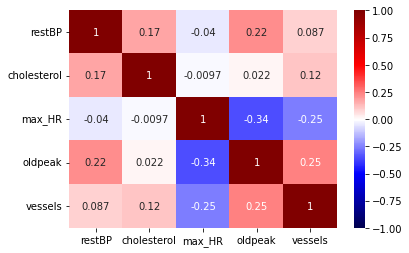

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.iloc[:,num_features].corr(), vmin=-1, vmax=1, annot=True, cmap='seismic')
plt.show()

The ```include_bias=True``` is the default value in the ```PolynomialFeatures``` Transformer. The bias column is the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model). We can set it to ```False``` for our tutorial.

In [ ]:
poly_tfr = preprocessing.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_feats = poly_tfr.fit_transform(data.iloc[:,num_features])
poly_feats.shape

(269, 15)

In [ ]:
poly_tfr.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2 x3',
 'x2 x4',
 'x3 x4']

In [ ]:
poly_feats[0]

array([1.150e+02, 5.640e+02, 1.600e+02, 1.600e+00, 0.000e+00, 6.486e+04,
       1.840e+04, 1.840e+02, 0.000e+00, 9.024e+04, 9.024e+02, 0.000e+00,
       2.560e+02, 0.000e+00, 0.000e+00])

In [ ]:
data.iloc[0,num_features]

restBP         115.0
cholesterol    564.0
max_HR         160.0
oldpeak          1.6
vessels          0.0
Name: 0, dtype: float64

# Putting it all together for data with mixed data types - Pipeline and ColumnTransformer

Our dataset contains heterogeneous data types. As we have done various different preprocessing on different columns - how do we get it all together? A simple approach could be to stitch it all together in a new dataframe. The following code snippet could do categorical encoding and binning. 
```
new_data = pd.DataFrame()

for i in range(6):
    new_data['age_'+str(i)] = data_disc[:,i]
new_data['sex'] = data.sex
for i in range(4):
    new_data['chest_pain_'+str(i)] = data_cat[:,i]
new_data['restBP'] = data.restBP
new_data['cholesterol'] = data.cholesterol
new_data['fast_sugar'] = data.fast_sugar
for i in range(3):
    new_data['rest_ECG_'+str(i)] = data_cat[:,4+i]
new_data['max_HR'] = data.max_HR
new_data['exer_angina'] = data.exer_angina
new_data['oldpeak'] = data.oldpeak
new_data['slope'] = data.slope
new_data['vessels'] = data.vessels
for i in range(3):
    new_data['thal_'+str(i)] = data_cat[:,7+i]
    
new_data.head()
```

However, as the number of preprocessing steps increase and change, this approach becomes difficult to scale. To rescue us from this difficulty, sklearn has the [```sklearn.compose```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) and [```sklearn.pipeline```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) packages. 

In [ ]:
from sklearn import compose
from sklearn import pipeline

[```Pipeline```](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) can be used to chain multiple fixed steps into one. So, for example, our preprocessing steps for numeric columns are fixed: Scaling, and doing polynomial feature creation. So, we can essentially encapsulate these into a pipeline.

In [ ]:
numeric_transformer = pipeline.Pipeline(steps=[('scaler', scaler), ('poly', poly_tfr)])

We can blindly apply this numeric transformer to all our columns of data. Starting with 13 columns, how many columns will the fitted product have? 

(13*1 + 13C2 = 13+78 = 91)

In [ ]:
numeric_transformer.fit_transform(data).shape

(269, 91)

Notice that this is the same as using the functions from sklearn directly.

In [ ]:
numeric_transformer = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler()), 
                                               ('poly', preprocessing.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True))])
numeric_transformer.fit_transform(data).shape

(269, 91)

However, this is not very useful (what is the meaning of a polynomial variable comprising a nominal variable multiplied by a real variable?)

The [```ColumnTransformer```](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) helps performing different transformations for different columns of the data, within a Pipeline that is safe from data leakage and that can be parametrized. To each column, a different transformation can be applied, such as preprocessing for different types of data. 

It is interesting to note that this ColumnTransformer in turn can be used in Pipeline to perform say some classification task. Though we are only focussed on preprocessing in this tutorial, the code blocks written now can easily be integrate with further steps in your project, which makes the ```Pipeline``` and ```ColumnTransformer``` utilities extremely useful.

In [ ]:
preprocessor = compose.ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, num_features),
                    ('disc', discretizer, disc_features),
                    ('cat', oh_enc, cat_features),
                    ('ord', ord_enc, ordinal_features)
                ], remainder="passthrough"
                )

In [ ]:
preprocd_data = preprocessor.fit_transform(data)
preprocd_data.shape

(269, 34)

In [ ]:
data_preprcd = pd.DataFrame(preprocd_data)
data_preprcd.index = data.index
data_preprcd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-0.915350,6.109282,0.441602,0.485905,-0.709146,-5.592128,-0.404220,-0.444773,0.649117,2.697870,2.968530,-4.332376,0.214576,-0.313160,-0.344578,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.411470,0.225444,-0.383335,-0.652213,-0.709146,-0.092763,0.157731,0.268366,0.291793,-0.086420,-0.147037,-0.159872,0.250016,0.271841,0.462514,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.187524,0.264281,-1.946373,-0.739760,0.362541,-0.049559,0.364991,0.138723,-0.067985,-0.514389,-0.195504,0.095813,1.439849,-0.705640,-0.268194,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,-0.635417,0.380792,-1.251689,-0.739760,0.362541,-0.241962,0.795344,0.470056,-0.230365,-0.476634,-0.281695,0.138053,0.925950,-0.453789,-0.268194,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.635417,-1.405720,-0.426753,-0.564665,-0.709146,0.893218,0.271166,0.358798,0.450603,0.599894,0.793761,0.996861,0.240972,0.302630,0.400430,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Dealing with missing values using the ```SimpleImputer```

We first randomly remove some values for age.

In [ ]:
data_drop = data.copy()
data_drop.iloc[np.random.randint(0, 268, size = 10).tolist(), 0] = np.nan
data_drop.age

0       NaN
1      57.0
2      64.0
3      74.0
4      65.0
       ... 
264    52.0
265    44.0
266    56.0
267    57.0
268    67.0
Name: age, Length: 269, dtype: float64

We then use the ```SimpleImputer``` to fill these missing values.

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data_drop)
data_filled = pd.DataFrame(imp_mean.transform(data_drop))
data_filled.columns, data_filled.index = data_drop.columns, data_drop.index
data_filled

,age,sex,chest_pain,restBP,cholesterol,fast_sugar,rest_ECG,max_HR,exer_angina,oldpeak,slope,vessels,thal
0,54.324324,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
1,57.000000,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
2,64.000000,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
3,74.000000,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
4,65.000000,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.000000,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
265,44.000000,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
266,56.000000,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
267,57.000000,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


# Image Data and PCA (Feature Decomposition)

## Dataset

Now let us work on image data, as we have already explored tabular, hierarchical and array data in the previous tutorials. Let us use the [Olivetti dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html). This dataset contains a set of face images of 40 different subjects. This dataset is available in sklearn itself. 

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces, targets = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


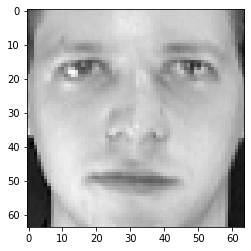

In [ ]:
image_shape = (64,64)
plt.imshow(faces[0].reshape(image_shape), cmap=plt.cm.gray) #imshow displays data as an image

In [ ]:
scaler = preprocessing.StandardScaler()
faces_scaled = scaler.fit_transform(faces)
faces_scaled.shape

(400, 4096)

## Principal Component Analysis

Principal Component Analysis is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is a technique which essentially helps us to reduce the dimensionality of our dataset. In [```sklearn.decomposition```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition), we have the *transformer* [```PCA```](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). It learns n_components in its ```fit``` method, and can be used on new data to project it on these components. 

Let us first find out how many components are sufficient to explain our data.

Text(0, 0.5, 'cumulative explained variance')

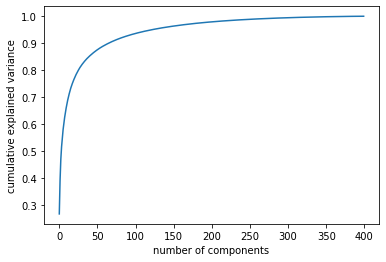

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(faces_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We see that 100 components explain about 90% of the variance in the dataset. Thus, those 100 components might be sufficient for our downstream tasks like prediction. As we have image data however, we can actually view these orthogonal components that PCA has learnt. These are called as Eigenfaces. A combination of these eigenfaces is actually usually sufficient to recreate the original sample. 

In [ ]:
n_components=100
h = w = 64

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, faces_scaled.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(faces_scaled)

eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 100 eigenfaces from 400 faces


In [ ]:
print(pca.components_.shape)

(100, 4096)


In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


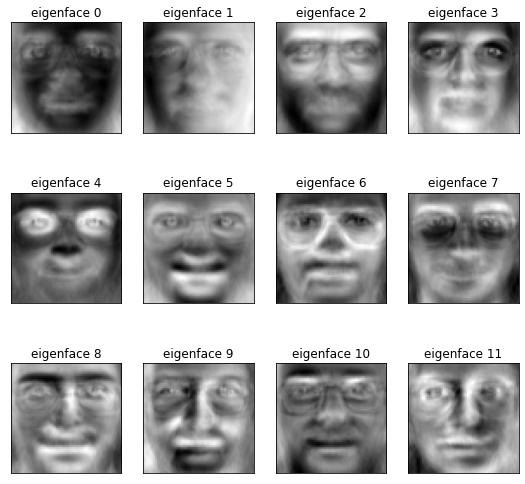

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

Eigenfaces are eigenvectors used in the computer vision problem of human face recognition. They are the principal components of a distribution of faces. They determine the variance in faces in a dataset, and the variances can be used to encode and decode a face in machine learning. 